## Prédire le prix de l'immobilier
Le jeu de données décrit des biens avec des variables quantitatives et qualitatives ainsi que le prix de vente
Introduction à la régression linéaire et aux variantes (rég. pénalisée comme lasso)
Le prix de vente va etre modélisé par les autres variables

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
repertoire = "../data"
os.chdir(repertoire)

#https://www.kaggle.com/code/michaelfumery/exercice-pr-diction-de-prix-de-maison/notebook

### Chargement des données : apprentissage, appli, éch. de submission kaggle

In [6]:
#sample_submission = pd.read_csv("prix_immo\\sample_submission.csv")

train = pd.read_csv("prix_immo/train.csv") # jeu de données d'entrainement (avec le prix)
appli = pd.read_csv("prix_immo/test.csv") # jeu de données où le prix est inconnu (à prédire)
#création d'une copie de chaque dataset
appli_copy  = appli.copy()
train_copy  = train.copy()

In [7]:
# visualiser premieres lignes
train_copy.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
len(train_copy.columns)

81

il y a 81 colonnes dont 79 variables X (features), 1 colonne ID et la variable cible "SalePrice".
La variable ID pourrait être supprimée
Nous allons concaténer les 2 datasets train et appli afin de procéder aux memes transformations sur les deux jeux de données (une colonne est créée pours identifier Train vs appli)

In [9]:
train_copy['train']  = 1
appli_copy['train']  = 0
data_full = pd.concat([train_copy, appli_copy], axis=0,sort=False)

In [10]:
data_full.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train
count,2919.000000,2919.000000,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,...,10,571,105,2919.000000,2919.000000,2919.000000,2918,2919,1460.000000,2919.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,3,4,4,NaN,NaN,NaN,9,6,NaN,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN,NaN
freq,NaN,NaN,2265,NaN,NaN,2907,120,1859,2622,2916,...,4,329,95,NaN,NaN,NaN,2525,2402,NaN,NaN
mean,1460.000000,57.137718,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,50.825968,6.213087,2007.792737,NaN,NaN,180921.195890,0.500171
std,842.787043,42.517628,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,567.402211,2.714762,1.314964,NaN,NaN,79442.502883,0.500086
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000,0.000000
25%,730.500000,20.000000,NaN,59.000000,7478.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129975.000000,0.000000
50%,1460.000000,50.000000,NaN,68.000000,9453.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000,1.000000
75%,2189.500000,70.000000,NaN,80.000000,11570.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000,1.000000


In [11]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

Nous allons calculer le pourcentage de valeurs manquantes pour chaque variable. On voit ci dessus que certaines var. ont un nombre non null faible. (MiscFeature)

In [12]:
df_NULL = [(c, data_full[c].isna().mean()*100) for c in data_full]
df_NULL = pd.DataFrame(df_NULL, columns=["Colonne", "Taux de NULL"])
df_NULL.sort_values("Taux de NULL", ascending=False)

,Colonne,Taux de NULL
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
25,MasVnrType,60.500171
...,...,...
75,MiscVal,0.000000
77,YrSold,0.000000
76,MoSold,0.000000
79,SaleCondition,0.000000


In [13]:
# Variables avec plus de 10% de NULL : suppression

#df_NULL = df_NULL.drop(['SalePrice'],axis=0)

df_NULL = df_NULL[df_NULL["Taux de NULL"] > 10]

df_NULL = df_NULL[df_NULL["Colonne"] != 'SalePrice'] # on ne supprime pas la cible

df_NULL.sort_values("Taux de NULL", ascending=False)

,Colonne,Taux de NULL
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506
25,MasVnrType,60.500171
57,FireplaceQu,48.646797
3,LotFrontage,16.649538


In [14]:
list_NULL_features = df_NULL["Colonne"].values

In [15]:
#list_NULL_features = list(df_NULL.Colonne)

data_full = data_full.drop(list_NULL_features,axis=1)
data_full.shape

(2919, 75)

In [16]:
df_NULL = [(c, data_full[c].isna().mean()*100) for c in data_full]
df_NULL = pd.DataFrame(df_NULL, columns=["Colonne", "Taux de NULL"])
df_NULL.sort_values("Taux de NULL", ascending=False)

,Colonne,Taux de NULL
73,SalePrice,49.982871
56,GarageFinish,5.447071
55,GarageYrBlt,5.447071
59,GarageQual,5.447071
60,GarageCond,5.447071
...,...,...
68,MiscVal,0.000000
70,YrSold,0.000000
69,MoSold,0.000000
72,SaleCondition,0.000000


### Feature Engineering : préparation des données pour la modélisation
On va traiter les val. manquantes
On traite differemment les var. numeriques (quantitatives) et les categorielles (qualitatives)

In [17]:
categorical_features = data_full.select_dtypes(include=['object'])
numerical_features = data_full.select_dtypes(exclude=['object'])

In [18]:
# Variables catégorielles :
print("Nombre de variables  :",categorical_features.shape[1])
print("\nNombre de valeurs nulles :\n",categorical_features.isnull().sum())

Nombre de variables  : 37

Nombre de valeurs nulles :
 MSZoning           4
Street             0
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinType2      80
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        1
Functional         2
GarageType       157
GarageFinish     159
GarageQual       159
GarageCond       159
PavedDrive         0
SaleType           1
SaleCondition      0
dtype: int64


Après consultation de la description des fichiers de données, nous allons compléter les valeurs nulles des categoricla features ainsi :

    BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, GarageType, GarageFinish, GarageQual, FireplaceQu, GarageCond seront complétés avec la valeur "None",
    les autres variables avec leur propre valeur la plus fréquente.

In [19]:
fill_None = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual','GarageCond']
categorical_features[fill_None]= categorical_features[fill_None].fillna('None')
fill_other = ['MSZoning','Utilities','Exterior1st','Exterior2nd','Electrical','KitchenQual','Functional','SaleType']
categorical_features[fill_other] = categorical_features[fill_other].fillna(categorical_features.mode().iloc[0])

In [20]:
categorical_features.info()
# LEs var. catégorielles sont traitées : 2919 val. non nulles


<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       2919 non-null   object
 1   Street         2919 non-null   object
 2   LotShape       2919 non-null   object
 3   LandContour    2919 non-null   object
 4   Utilities      2919 non-null   object
 5   LotConfig      2919 non-null   object
 6   LandSlope      2919 non-null   object
 7   Neighborhood   2919 non-null   object
 8   Condition1     2919 non-null   object
 9   Condition2     2919 non-null   object
 10  BldgType       2919 non-null   object
 11  HouseStyle     2919 non-null   object
 12  RoofStyle      2919 non-null   object
 13  RoofMatl       2919 non-null   object
 14  Exterior1st    2919 non-null   object
 15  Exterior2nd    2919 non-null   object
 16  ExterQual      2919 non-null   object
 17  ExterCond      2919 non-null   object
 18  Foundation     2919 non-null   ob

nous allons pouvoir gérer les manquants sur les var. quantitatives:

Les numerical features (hors SalePrice) avec le plus grand nombre de NULL sont les suivantes :
    LotFrontage
    GarageYrBlt

Nous allons utiliser la médiane de ces variables pour compléter les valeurs nulles. Pour les autres variables, les valeurs nulles seront complétées à 0.

In [21]:
numerical_features['GarageYrBlt'] = numerical_features['GarageYrBlt'].fillna(numerical_features['GarageYrBlt'].median())
#numerical_features['LotFrontage'] = numerical_features['LotFrontage'].fillna(numerical_features['LotFrontage'].median())
numerical_features['MasVnrArea'] = numerical_features['MasVnrArea'].fillna(numerical_features['MasVnrArea'].median())
numerical_features = numerical_features.fillna(0)


### Feature engineering : variables enrichies

In [22]:

# Age de la maison
numerical_features['HouseAge'] = numerical_features['YrSold'] - numerical_features['YearBuilt']
# Age depuis la dernière rénovation    
numerical_features['RemodAge'] = numerical_features['YrSold'] - numerical_features['YearRemodAdd']


# Surface habitable totale
numerical_features['TotalSF'] = numerical_features['TotalBsmtSF']+ numerical_features['GrLivArea']+ numerical_features['GarageArea']
# Surface habitable au sol
numerical_features['1st2ndFlrSF'] = numerical_features['1stFlrSF'] + numerical_features['2ndFlrSF']   

# Lot Utilization: Ratio of total square footage to lot area
numerical_features['LotRatio'] = numerical_features['TotalSF'] / numerical_features['LotArea']


In [23]:
# Garage Score: Quality * Condition of garage (numeric mapping)
qual_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
numerical_features['GarageScore'] = (categorical_features['GarageQual'].map(qual_map, na_action='ignore').fillna(0) * categorical_features['GarageCond'].map(qual_map, na_action='ignore').fillna(0))

categorical_features=categorical_features.drop(['GarageQual','GarageCond'], axis=1)

### Feature engineering : encoder les variables catégorielles
En effet, la modélisation suppose que les variables soient représentées par des nombres

In [24]:

# pandas get dummies crée des variables binaires pour chaque modalité d'une variable catégorielle

categorical_features = pd.get_dummies(categorical_features, drop_first=True)

categorical_features.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


### TABLE POUR L'APPRENTISSAGE (X, Y )
L'usage est de séparer les données en un jeu X contenant les features et un vecteur col y contenant juste la cible
Il est obligatoire en ML de séparer en un ech de train et de appli, le appli n'est pas utilisé dans l'apprentissage.

In [25]:
df_final = pd.concat([numerical_features,categorical_features], axis=1,sort=False)
# Les va. manquantes sur le prix de vente ne peuvent pas etre imputées, il faut les supprimer
df_final = df_final[df_final['SalePrice'] >0 ]
df_final.shape

X = df_final.drop(['SalePrice','train','Id'], axis=1)
y = df_final['SalePrice']


In [26]:
# Séparation en un jeu d'entrainement et un jeu d'application (test)
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X,y, train_size=0.75, test_size=0.25, random_state=123)

### Modele naif : prédire le prix par la moyenne des prix sur l'apprentissage

In [27]:
m1_prix_mean = np.mean(y_train)
m1_prix_mean

np.float64(180201.98812785387)

$$ RMSE = \sqrt{ \frac {\sum (obs - pred)^2 }{n} } $$

In [28]:
RMSE_m1_train = np.sqrt(np.sum((y_train - m1_prix_mean)**2) / X_train.shape[0])
RMSE_m1_valid = np.sqrt(np.sum((y_valid - m1_prix_mean)**2) / X_valid.shape[0])

print(RMSE_m1_train,RMSE_m1_valid)
# le RMSE du modèle "naïf" qui prédit toujours la moyenne est de 80 k $ et 77 k $ sur le jeu de validation

79980.12778054655 77709.46442514208


In [29]:
#Fonction de calculs des metriques importantes MAE, MSE, MAPE, RMSE
def metrics_regression(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(diff / y_true)) * 100
    dict_metrics = {"Métrique":["MAE", "MSE", "RMSE", "MAPE"], "Résultats":[mae, mse, rmse, mape]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [30]:
# metrique sur l'échantillon de train validation
metrics_regression(y_train, m1_prix_mean)
metrics_regression(y_valid, m1_prix_mean)

,Métrique,Résultats
0,MAE,5.593751e+04
1,MSE,6.038761e+09
2,RMSE,7.770946e+04
3,MAPE,3.388496e+01


### Modele de reg lineaire : selection de variables puis régression

In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
m2_reglin = RFE(regressor, n_features_to_select=25, step=1) # step=1 means removing one feature at each iteration
m2_reglin = m2_reglin.fit(X_train, y_train)



In [32]:
# The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1.
ranking = m2_reglin.ranking_
print(ranking)

[198 205  17 110 177 182 193 199 200 186 185 203 188 196 197  31 190   2
 103 134  28  83  46 202  42 195 191 201 192 187 189 176 204 174 172 184
 183 194 179 118 167  39  37  36  38  26  16  61 157  75 168  74  43  49
  89 102 131  58  79 140 109  72 116  77   1 161 114 165 162 125 163 135
 148   1   1 178  73 164  76  35   1 136  60  91  69  33 101 128  92  86
   9  67 132   1   1  70  68 130  85  84   1   5 173 159  64  45 104  30
  51 146  47 169  13   7   1   1 206   1   1   1   1 207 158  10 108   1
  98 208  62  97   4  20 166 144 143  93 105  90 111   1 107   3  63  59
 106  18  21  99  96  19  94  41  40 120  24 145  23  65  66 155  29 113
   1   1   1   1 180   1  22 115   1 129  88  87 152 100 153  32 181  71
 127 138 141  44 142 139 171  34 123  14 170 124 121   6 122 112 119  95
 154 160   1   1   1   8  82  81  78 209  80  54  57  52  55  56  48  53
 117 175 147 137  50   1  27 126 149  11 133 150 156  25  15 151  12]


In [33]:
len(m2_reglin.support_)

233

In [34]:
# # Variables selectionnees
# mask = m2_reglin.support_ == True

# # Apply the mask
# X_train_df = X_train[mask]


In [35]:
y_train_chap = m2_reglin.predict(X_train)
y_valid_chap = m2_reglin.predict(X_valid)

RMSE_m2_train = np.sqrt(np.sum((y_train - y_train_chap)**2) / X_train.shape[0])
RMSE_m2_valid = np.sqrt(np.sum((y_valid - y_valid_chap)**2) / X_valid.shape[0])

print(RMSE_m2_train,RMSE_m2_valid)

42875.07673176725 44466.768805676205


In [36]:
# metrique sur l'échantillon de train validation
metrics_regression(y_valid, y_valid_chap)
# le MAPE est de 19 % sur le jeu de validation

,Métrique,Résultats
0,MAE,3.252268e+04
1,MSE,1.977294e+09
2,RMSE,4.446677e+04
3,MAPE,1.904983e+01


In [37]:
# Graphique des prédictions en fonction des valeurs réelles, échantillon de validation
df_graph=pd.concat([pd.Series(y_valid),pd.Series(y_valid_chap)], axis=1,sort=False)
df_graph.columns=['SalePrice','predictions']

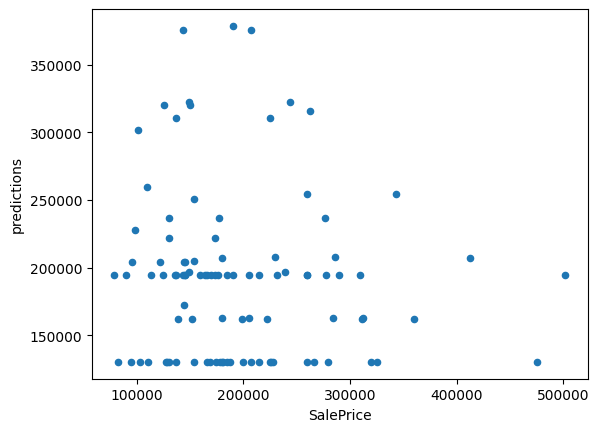

In [38]:
df_graph.plot.scatter(x='SalePrice', y='predictions');

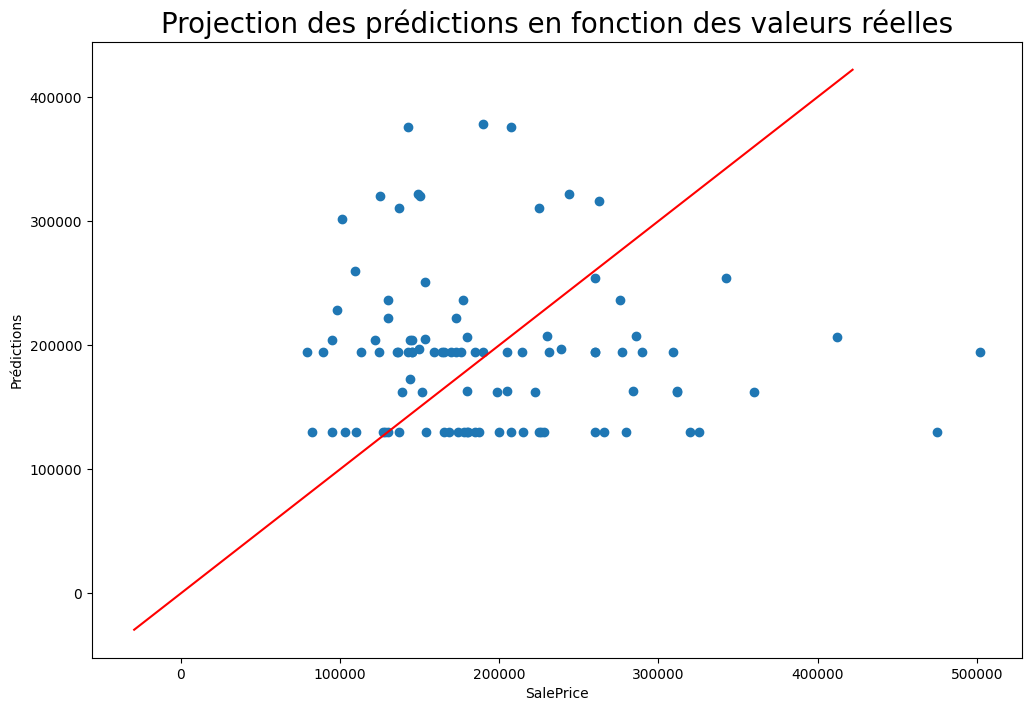

In [39]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df_graph.SalePrice, df_graph.predictions)
ax.plot([df_graph.predictions.min(), df_graph.predictions.max()], [df_graph.predictions.min(), df_graph.predictions.max()], color='r')
ax.set(xlabel='SalePrice', ylabel='Prédictions')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

### Modele de reg lineaire lasso
Il s'agit d'une reg lin pénalisée : la fonction de cout est pénalisée afin de pouvoir traiter les var corrélée, le LASSO supprime des variables en les mettant à 0
Une régression pénalisée de type ridge (L2) permet de contraindre l'espace des coef estimés pour ne pas qu'ils prennent des valeurs contradictoires et très élevées,
Si la régression est de type lasso (L1) alors certains coefficients vont être annulés.
Le paramètre alpha contrôle cela : 
C = regularization strength; must be a positive float = higher values specify stronger regularization.

A noter que dans certaines classes, le paramètre est C=1/alpha 

Tester plusieurs valeurs de alpha 10,25,100 .. et regardez l'impact sur les coefficients

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # normalise l’éch d’apprentissage
X_train_norm = scaler.transform(X_train)
X_valid_norm= scaler.transform(X_valid)  # applique à l’éch test

In [41]:
### Modele de reg lineaire lasso avec pénalisation 1/1000

from sklearn.linear_model import Lasso
from sklearn import linear_model
m3_reglinlasso1000=Lasso(alpha = 1000)
m3_reglinlasso1000 = m3_reglinlasso1000.fit(X_train_norm, y_train)


In [42]:
# Coefficients du modèle
pd.DataFrame({'Coefficients': list(m3_reglinlasso1000.coef_)}, list(X_train.columns.values))

,Coefficients
MSSubClass,-7319.213474
LotArea,3036.126464
OverallQual,16739.733529
OverallCond,4060.858607
YearBuilt,1688.833930
...,...
SaleCondition_AdjLand,0.000000
SaleCondition_Alloca,-0.000000
SaleCondition_Family,-884.950097
SaleCondition_Normal,0.000000


In [43]:
# Combien sont nuls sur 233
coef=list(m3_reglinlasso1000.coef_)

# combien d'élemnts non nuls ?
feature_0_1000= list(map(lambda x: x==0.0, coef))
feature_non0_1000= list(map(lambda x: x!=0.0, coef))
print("Coef nuls",feature_0_1000.count(True)) 
print("% de coef nuls",feature_0_1000.count(True)/len(coef)*100) 

Coef nuls 145
% de coef nuls 62.231759656652365


In [44]:
### Modele de reg lineaire lasso avec pénalisation 1/1000
m3_reglinlasso5000=Lasso(alpha = 5000)
m3_reglinlasso5000 = m3_reglinlasso5000.fit(X_train_norm, y_train)

In [45]:
# Combien sont nuls sur 233
coef=list(m3_reglinlasso5000.coef_)

# combien d'élemnts non nuls ?
feature_0= list(map(lambda x: x==0.0, coef))
print("Coef nuls",feature_0.count(True)) 
print("% de coef nuls",feature_0.count(True)/len(coef)*100) 

del feature_0

Coef nuls 208
% de coef nuls 89.27038626609442


In [46]:
y_train_chap = m3_reglinlasso5000.predict(X_train_norm)
y_valid_chap = m3_reglinlasso5000.predict(X_valid_norm)


print("RMSE Lasso 5000")

# metrique sur l'échantillon de train validation
metrics_regression(y_valid, y_valid_chap)

RMSE Lasso 5000


,Métrique,Résultats
0,MAE,2.054248e+04
1,MSE,1.144774e+09
2,RMSE,3.383450e+04
3,MAPE,1.164873e+01


In [47]:

y_train_chap = m3_reglinlasso1000.predict(X_train_norm)
y_valid_chap = m3_reglinlasso1000.predict(X_valid_norm)


print("RMSE Lasso 1000")


# metrique sur l'échantillon de train validation
metrics_regression(y_valid, y_valid_chap)
# le MAPE est de 10 % sur le jeu de validation pour la pénalisation 1000

RMSE Lasso 1000


,Métrique,Résultats
0,MAE,1.802541e+04
1,MSE,8.291779e+08
2,RMSE,2.879545e+04
3,MAPE,1.020642e+01


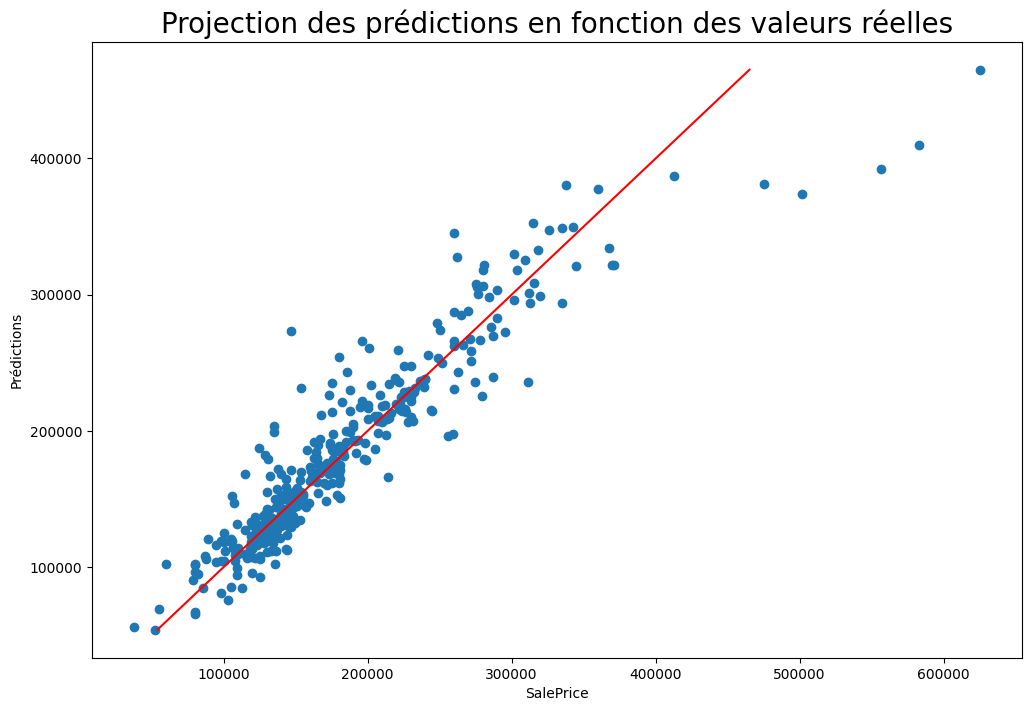

In [48]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(y_valid, y_valid_chap)
ax.plot([y_valid_chap.min(), y_valid_chap.max()], [y_valid_chap.min(), y_valid_chap.max()], color='r')
ax.set(xlabel='SalePrice', ylabel='Prédictions')
plt.title("Projection des prédictions en fonction des valeurs réelles", fontsize=20)
plt.show()

## Faites une prédiction pour une nouvelle maison

In [49]:
df_final = pd.concat([numerical_features,categorical_features], axis=1,sort=False)
new_house = df_final[df_final['SalePrice'] ==0 ]
new_house = new_house.drop(['SalePrice','train','Id'], axis=1).head(1)
new_house


,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,20,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False


In [50]:
new_house_norm= scaler.transform(new_house)

prediction = m3_reglinlasso1000.predict(new_house_norm)
features = new_house.columns
print("\n La valeur prévue pour la maison est: {:,}".format(round(prediction[0])))


 La valeur prévue pour la maison est: 103,675


In [51]:
np.array(new_house)

array([[20, 11622, 5, 6, 1961, 1961, 0.0, 468.0, 144.0, 270.0, 882.0,
        896, 0, 0, 896, 0.0, 0.0, 1, 0, 2, 1, 5, 0, 1961.0, 1.0, 730.0,
        140, 0, 0, 0, 120, 0, 0, 6, 2010, 49, 49, 2508.0, 896,
        0.21579762519359835, 9, False, True, False, False, True, False,
        False, True, False, False, True, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, True, False, False, False,
        False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        False, False, True, False, False, False, False, False, True,
        False, False, False, False, True, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, True, False, False, False, False,
        False, False, F

# D'autres models

In [52]:
from sklearn.tree import DecisionTreeRegressor
modele_arbre=DecisionTreeRegressor(random_state = 42, max_depth = 5, min_samples_leaf = 30)
modele_arbre.fit(X_train_norm, y_train)
y_train_chap = modele_arbre.predict(X_train_norm)
y_valid_chap = modele_arbre.predict(X_valid_norm)


print("RMSE Decision Tree Default")

# metrique sur l'échantillon de train validation
metrics_regression(y_valid, y_valid_chap)


RMSE Decision Tree Default


,Métrique,Résultats
0,MAE,2.405212e+04
1,MSE,1.413410e+09
2,RMSE,3.759534e+04
3,MAPE,1.377796e+01


In [53]:
from sklearn.ensemble import RandomForestRegressor

modele_random_forest=RandomForestRegressor(random_state = 42)
modele_random_forest.fit(X_train_norm, y_train)
y_train_chap = modele_random_forest.predict(X_train_norm)
y_valid_chap = modele_random_forest.predict(X_valid_norm)


print("RMSE Random Forest Default")

# metrique sur l'échantillon de train validation
metrics_regression(y_valid, y_valid_chap)


RMSE Random Forest Default


,Métrique,Résultats
0,MAE,1.654097e+04
1,MSE,7.402684e+08
2,RMSE,2.720787e+04
3,MAPE,9.512902e+00


In [55]:
from sklearn.ensemble import GradientBoostingRegressor

modele_gradient_boosting = GradientBoostingRegressor(random_state = 42)
modele_gradient_boosting.fit(X_train_norm, y_train)
y_train_chap = modele_gradient_boosting.predict(X_train_norm)
y_valid_chap = modele_gradient_boosting.predict(X_valid_norm)


print("RMSE Gradient Boosting Default")

# metrique sur l'échantillon de train validation
metrics_regression(y_valid, y_valid_chap)

RMSE Gradient Boosting Default


,Métrique,Résultats
0,MAE,1.548865e+04
1,MSE,6.021023e+08
2,RMSE,2.453777e+04
3,MAPE,8.669971e+00
